In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('integrated Asma Data_basedOnAdmission.csv')
df

num_sequencial  sexo  idade  dicofre distrito concelho  \
0             372731     1     35   111009   LISBOA   OEIRAS   
1             945004     1     11   111012   LISBOA   OEIRAS   
2            1156492     1      5   111012   LISBOA   OEIRAS   
3            1156493     2     45   110658   LISBOA   LISBOA   
4             114619     1     26   110658   LISBOA   LISBOA   
...              ...   ...    ...      ...      ...      ...   
1095          354903     2     71   110658   LISBOA   LISBOA   
1096          527675     2     20   111004   LISBOA   OEIRAS   
1097          559591     1     12   110658   LISBOA   LISBOA   
1098         1073017     2     82   111014   LISBOA   OEIRAS   
1099           13274     2     84   110601   LISBOA   LISBOA   

                       freguesia                 regiao nacionalidade  \
0                    PORTO SALVO  LISBOA E VALE DO TEJO      PORTUGAL   
1                          ALGÉS  LISBOA E VALE DO TEJO        BRASIL   
2                          ALGÉS  LISBOA E VALE DO TEJO      PORTUGAL   
3                          BELÉM  LISBOA E VALE DO TEJO      PORTUGAL   
4                          BELÉM  LISBOA E VALE DO TEJO      PORTUGAL   
...                          ...                    ...           ...   
1095                       BELÉM  LISBOA E VALE DO TEJO      PORTUGAL   
1096  OEIRAS E S JULIAO DA BARRA  LISBOA E VALE DO TEJO      PORTUGAL   
1097                       BELÉM  LISBOA E VALE DO TEJO      PORTUGAL   
1098  OEIRAS E S.JULIÃO DA BARRA  LISBOA E VALE DO TEJO      PORTUGAL   
1099                       AJUDA  LISBOA E VALE DO TEJO      PORTUGAL   

     data_admissao  ...  solarenergy uvindex  severerisk              sunrise  \
0       2019-01-01  ...         10.3       5         NaN  2019-01-01T07:54:47   
1       2019-01-01  ...         10.3       5         NaN  2019-01-01T07:54:47   
2       2019-01-01  ...         10.3       5         NaN  2019-01-01T07:54:47   
3       2019-01-01  ...         10.3       5         NaN  2019-01-01T07:54:47   
4       2019-01-01  ...         10.3       5         NaN  2019-01-01T07:54:47   
...            ...  ...          ...     ...         ...                  ...   
1095    2020-03-03  ...         12.0       7         NaN  2020-03-03T07:05:26   
1096    2020-03-03  ...         12.0       7         NaN  2020-03-03T07:05:26   
1097    2019-05-02  ...         26.4       9         NaN  2019-05-02T06:38:24   
1098    2020-01-11  ...         10.5       5         NaN  2020-01-11T07:54:35   
1099    2020-01-22  ...          6.4       5         NaN  2020-01-22T07:50:20   

                   sunset moonphase              conditions  \
0     2019-01-01T17:25:27      0.91                   Clear   
1     2019-01-01T17:25:27      0.91                   Clear   
2     2019-01-01T17:25:27      0.91                   Clear   
3     2019-01-01T17:25:27      0.91                   Clear   
4     2019-01-01T17:25:27      0.91                   Clear   
...                   ...       ...                     ...   
1095  2020-03-03T18:31:59      0.28  Rain, Partially cloudy   
1096  2020-03-03T18:31:59      0.28  Rain, Partially cloudy   
1097  2019-05-02T20:29:27      0.97                   Clear   
1098  2020-01-11T17:34:19      0.51                   Clear   
1099  2020-01-22T17:46:07      0.98  Rain, Partially cloudy   

                                            description       icon  \
0                  Clear conditions throughout the day.  clear-day   
1                  Clear conditions throughout the day.  clear-day   
2                  Clear conditions throughout the day.  clear-day   
3                  Clear conditions throughout the day.  clear-day   
4                  Clear conditions throughout the day.  clear-day   
...                                                 ...        ...   
1095  Partly cloudy throughout the day with rain in ...       rain   
1096  Partly cloudy throughout the day with rain in ...       rain   


In [3]:
df.columns

Index(['num_sequencial', 'sexo', 'idade', 'dicofre', 'distrito', 'concelho',
       'freguesia', 'regiao', 'nacionalidade', 'data_admissao', 'colorid',
       'cor', 'cod_proveniencia', 'proveniencia', 'cod_causa', 'causa',
       'cod_destino', 'destino', 'diagnostico', 'classe', 'asma', 'date',
       'pollen_intensity', 'name', 'datetime', 'tempmax', 'tempmin', 'temp',
       'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'precipcover', 'preciptype', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'severerisk', 'sunrise', 'sunset', 'moonphase', 'conditions',
       'description', 'icon', 'stations'],
      dtype='object')

In [4]:
toDrop = ['data_admissao', 'dicofre', 'distrito', 'concelho', 'freguesia', 'regiao', 'nacionalidade',
         'cod_proveniencia', 'proveniencia', 'cod_causa', 'causa', 'cod_destino', 'destino',
         'diagnostico', 'classe', 'asma', 'date', 'name','snow', 'snowdepth', 'winddir', 'cor',
         'severerisk', 'sunrise', 'sunset', 'stations', 'icon', 'description', 'preciptype',
         'moonphase']

In [5]:
df['datetime'].value_counts()

2019-05-14    9
2019-11-25    9
2019-05-15    9
2020-01-27    8
2020-02-17    8
             ..
2019-09-15    1
2019-09-22    1
2019-10-01    1
2019-10-02    1
2020-01-22    1
Name: datetime, Length: 395, dtype: int64

In [6]:
dumy_df = pd.DataFrame()
# print()
dumy_df['datetime'] = list(df.groupby(['datetime']).size().index)
dumy_df['athmaCounter'] = list(df.groupby(['datetime']).size())
dumy_df

datetime  athmaCounter
0    2019-01-01             5
1    2019-01-02             3
2    2019-01-03             1
3    2019-01-04             5
4    2019-01-05             2
..          ...           ...
390  2020-03-19             1
391  2020-03-20             1
392  2020-03-26             1
393  2020-03-28             1
394  2020-03-30             1

[395 rows x 2 columns]

In [7]:
df.groupby(['datetime']).size().index[0]

'2019-01-01'

In [8]:
dailydata = pd.read_csv('everyday weather and admissions.csv')
dailydata['datetime'] = pd.to_datetime(dailydata['datetime'], errors='coerce')

In [9]:
for col in dailydata:
    if col  in toDrop:
        dailydata.drop(col, axis=1, inplace=True)

In [10]:
dailydata['admission number'].value_counts()

2    102
1    101
3     81
0     61
4     52
5     30
6     18
7      5
9      3
8      3
Name: admission number, dtype: int64

In [11]:
# Low level

162/456

0.35526315789473684

In [12]:
# moderate

183/456

0.40131578947368424

In [13]:
# High level

111/456

0.24342105263157895

In [14]:
dailydata['risk level'] = None
for i in range(len(dailydata)):
    if dailydata.loc[i, 'admission number'] < 2:
        dailydata.loc[i, 'risk level'] = 'low risk'
    elif dailydata.loc[i, 'admission number'] == 2 or dailydata.loc[i, 'admission number'] == 3:
        dailydata.loc[i, 'risk level'] = 'moderate risk'
    elif dailydata.loc[i, 'admission number'] > 3:
        dailydata.loc[i, 'risk level'] = 'high risk'
dailydata['risk level'].value_counts()


moderate risk    183
low risk         162
high risk        111
Name: risk level, dtype: int64

In [15]:
dailydata.to_csv('daily data.csv', index=False)

In [16]:
from plotly_calplot import calplot
# creating the plot
fig = calplot(
         dailydata,
         x='datetime',
         y='admission number'
)
fig.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f40553e6a00>,
 'caps': [<matplotlib.lines.Line2D at 0x7f40553e6070>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f40553e6eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f40553e6be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f405eb5e310>],
 'means': []}

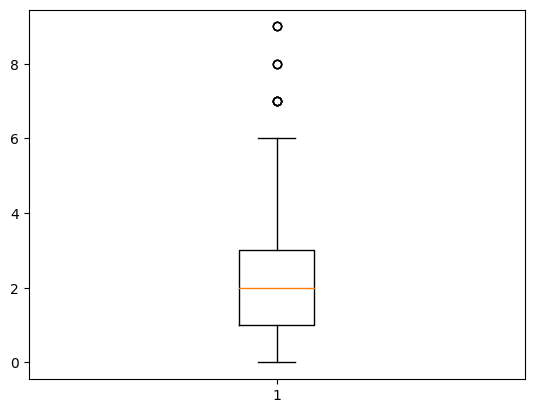

In [61]:
plt.boxplot(dailydata['admission number'])

In [62]:
dailydata['admission number'].describe()

count    456.000000
mean       2.412281
std        1.812345
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: admission number, dtype: float64

In [63]:
# df.pivot_table(index='asma', columns='datetime', aggfunc='count')


In [64]:
df.groupby(['num_sequencial']).size().value_counts()

1     720
2     106
3      28
4       5
5       3
7       2
15      1
9       1
11      1
dtype: int64

In [65]:
df.groupby(['datetime']).size().value_counts()

2    102
1    101
3     81
4     52
5     30
6     18
7      5
9      3
8      3
dtype: int64

In [66]:
# # reshape the data for heatmap; if there's no need to aggregate a function, then use .pivot(...)
# dfp = df.pivot_table(index='datetime', values='asma', aggfunc='count')
# dfp
# # # display(dfp.head())
# # date   2016-08-09  2016-08-11  2016-08-13  2016-08-15  2016-08-17  2016-08-19  2016-08-21  2016-08-23  2016-08-25  2016-09-09
# # depth                                                                                                                        
# # 1.50     0.334661         NaN         NaN    0.302670    0.314186    0.325257    0.313645    0.263135         NaN         NaN
# # 1.75     0.305488    0.303005    0.410124    0.299095    0.313899    0.280732    0.275758    0.260641         NaN    0.318099
# # 2.00     0.322312    0.274105         NaN    0.319606    0.268984    0.368449    0.311517    0.309923         NaN    0.306162
# # 2.25     0.289959    0.315081         NaN    0.302202    0.306286    0.339809    0.292546    0.314225    0.263875         NaN
# # 2.50     0.314227    0.296968         NaN    0.312705    0.333797    0.299556    0.327187    0.326958         NaN         NaN

# # plot
# fig, ax = plt.subplots(figsize=(15,10))
# sns.heatmap(dfp, cmap='GnBu')

In [67]:
df.drop(['data_admissao', 'dicofre', 'distrito', 'concelho', 'freguesia', 'regiao', 'nacionalidade',
         'cod_proveniencia', 'proveniencia', 'cod_causa', 'causa', 'cod_destino', 'destino',
         'diagnostico', 'classe', 'asma', 'date', 'name','snow', 'snowdepth', 'winddir', 'cor',
         'severerisk', 'sunrise', 'sunset', 'stations', 'icon', 'description', 'preciptype',
         'moonphase'],
        axis=1, inplace=True)

In [68]:
df

num_sequencial  sexo  idade  colorid pollen_intensity    datetime  \
0             372731     1     35      3.0             good  2019-01-01   
1             945004     1     11      2.0             good  2019-01-01   
2            1156492     1      5      2.0             good  2019-01-01   
3            1156493     2     45      2.0             good  2019-01-01   
4             114619     1     26      4.0             good  2019-01-01   
...              ...   ...    ...      ...              ...         ...   
1095          354903     2     71      3.0             good  2020-03-03   
1096          527675     2     20      3.0             good  2020-03-03   
1097          559591     1     12      2.0         elevados  2019-05-02   
1098         1073017     2     82      3.0             good  2020-01-11   
1099           13274     2     84      4.0             good  2020-01-22   

      tempmax  tempmin  temp  feelslikemax  ...  precipcover  windgust  \
0        16.0      7.6  11.5          16.0  ...         0.00       NaN   
1        16.0      7.6  11.5          16.0  ...         0.00       NaN   
2        16.0      7.6  11.5          16.0  ...         0.00       NaN   
3        16.0      7.6  11.5          16.0  ...         0.00       NaN   
4        16.0      7.6  11.5          16.0  ...         0.00       NaN   
...       ...      ...   ...           ...  ...          ...       ...   
1095     19.5     11.2  15.2          19.5  ...        12.50      38.9   
1096     19.5     11.2  15.2          19.5  ...        12.50      38.9   
1097     27.6     13.9  20.2          27.5  ...         0.00       NaN   
1098     14.0      7.8  10.7          14.0  ...         0.00       NaN   
1099     11.5      8.6   9.8          11.5  ...        16.67      37.1   

      windspeed  sealevelpressure  cloudcover  visibility  solarradiation  \
0          11.1            1031.6         1.2        10.1           117.2   
1          11.1            1031.6         1.2        10.1           117.2   
2          11.1            1031.6         1.2        10.1           117.2   
3          11.1            1031.6         1.2        10.1           117.2   
4          11.1            1031.6         1.2        10.1           117.2   
...         ...               ...         ...         ...             ...   
1095       22.3            1023.6        63.8        10.8           140.7   
1096       22.3            1023.6        63.8        10.8           140.7   
1097       22.7            1010.4         1.4        11.5           306.1   
1098       15.7            1031.5         2.1        10.8           121.9   
1099       25.0            1015.3        50.8        11.8            75.2   

      solarenergy  uvindex              conditions  
0            10.3        5                   Clear  
1            10.3        5                   Clear  
2            10.3        5                   Clear  
3            10.3        5                   Clear  
4            10.3        5                   Clear  
...           ...      ...                     ...  
1095         12.0        7  Rain, Partially cloudy  
1096         12.0        7  Rain, Partially cloudy  
1097         26.4        9                   Clear  
1098         10.5        5                   Clear  
1099          6.4        5  Rain, Partially cloudy  

[1100 rows x 26 columns]

<AxesSubplot: >

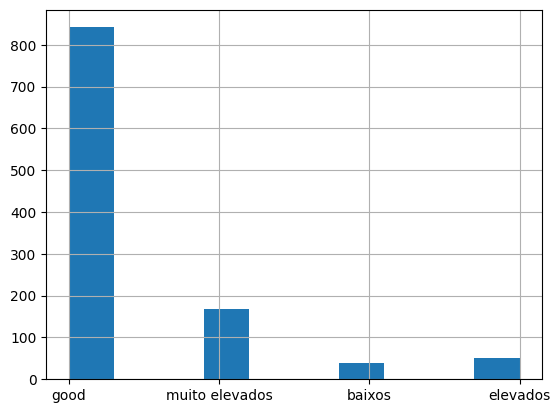

In [69]:
df['pollen_intensity'].hist()

<AxesSubplot: >

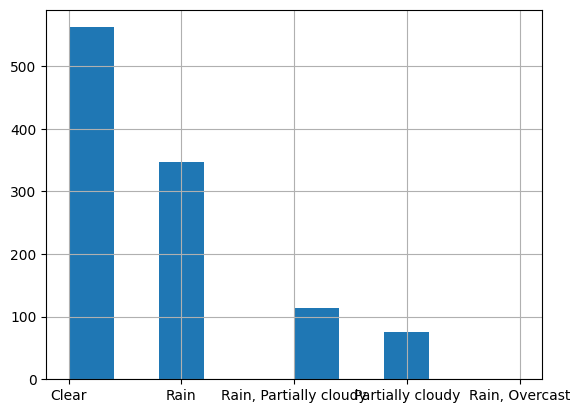

In [70]:
df['conditions'].hist()

array([[<AxesSubplot: title={'center': 'humidity'}>]], dtype=object)

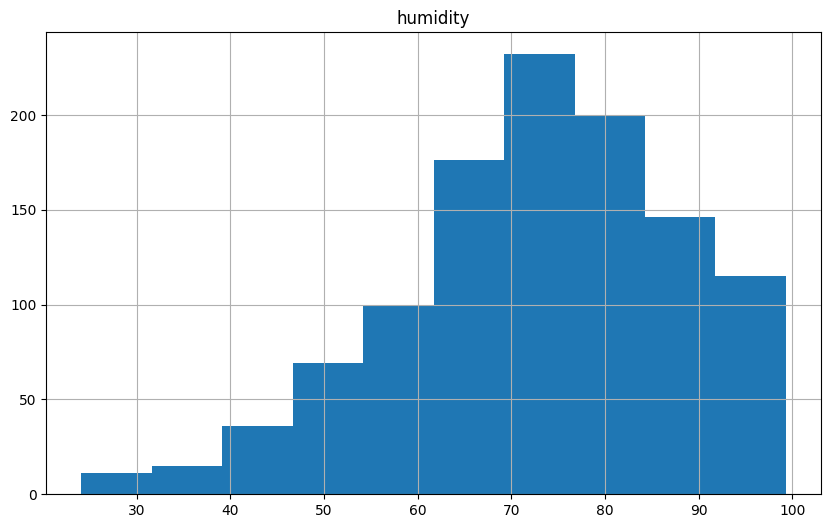

In [71]:
df[['humidity']].hist(figsize=(10,6))

array([[<AxesSubplot: title={'center': 'baixos'}>,
        <AxesSubplot: title={'center': 'elevados'}>],
       [<AxesSubplot: title={'center': 'good'}>,
        <AxesSubplot: title={'center': 'muito elevados'}>]], dtype=object)

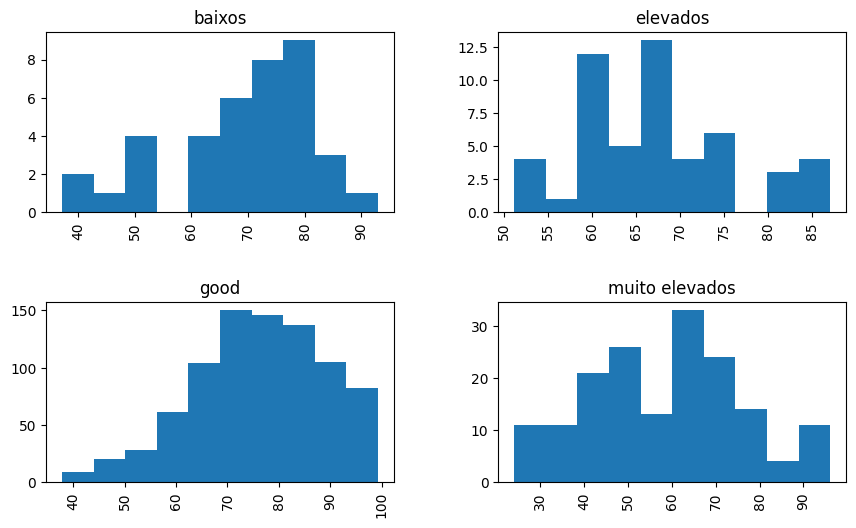

In [72]:
df[['humidity', 'pollen_intensity']].hist(figsize=(10,6), by='pollen_intensity')

array([[<AxesSubplot: title={'center': 'Clear'}>,
        <AxesSubplot: title={'center': 'Partially cloudy'}>],
       [<AxesSubplot: title={'center': 'Rain'}>,
        <AxesSubplot: title={'center': 'Rain, Overcast'}>],
       [<AxesSubplot: title={'center': 'Rain, Partially cloudy'}>,
        <AxesSubplot: >]], dtype=object)

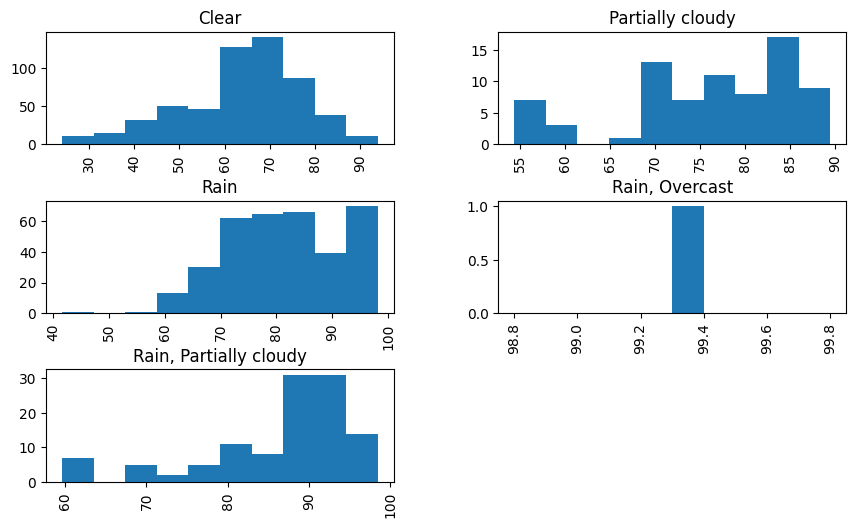

In [73]:
df[['conditions', 'humidity']].hist(figsize=(10,6), by='conditions')

array([[<AxesSubplot: title={'center': 'baixos'}>,
        <AxesSubplot: title={'center': 'elevados'}>],
       [<AxesSubplot: title={'center': 'good'}>,
        <AxesSubplot: title={'center': 'muito elevados'}>]], dtype=object)

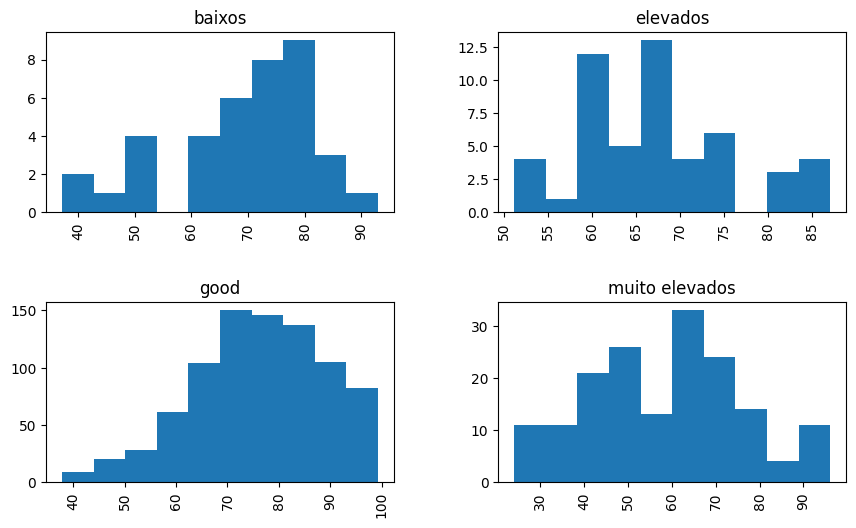

In [74]:
df[['humidity', 'pollen_intensity']].hist(figsize=(10,6), by='pollen_intensity')

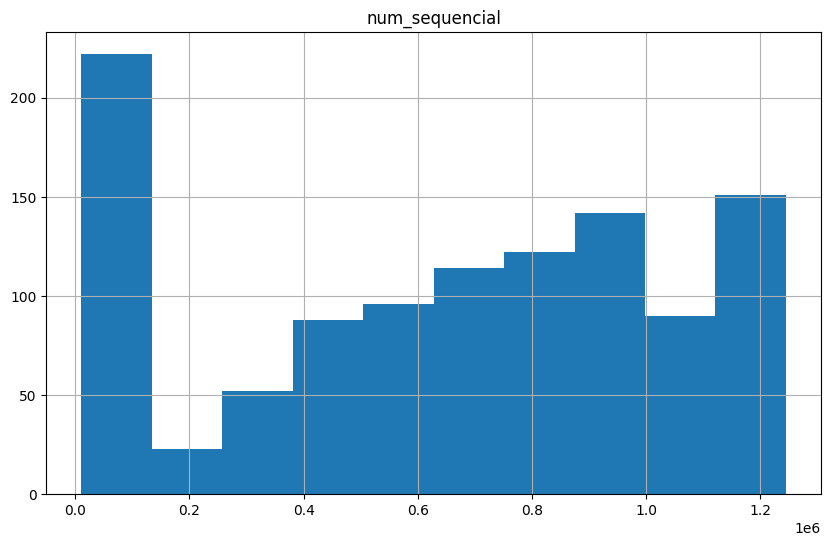

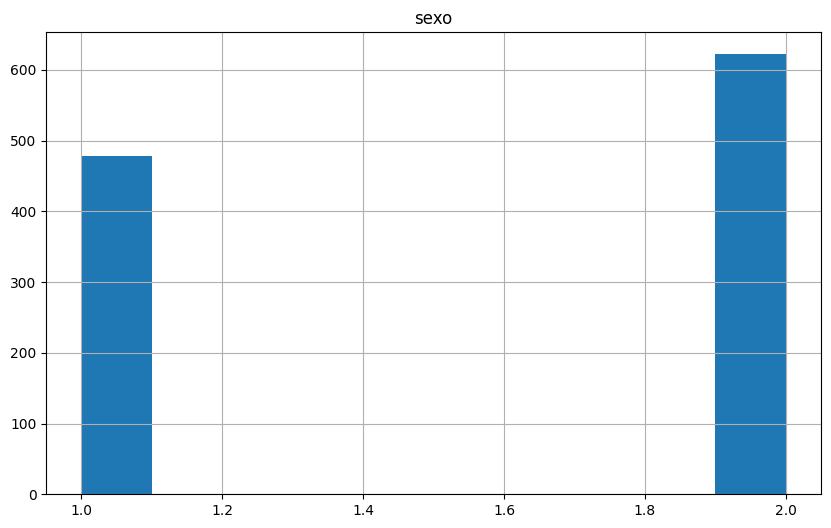

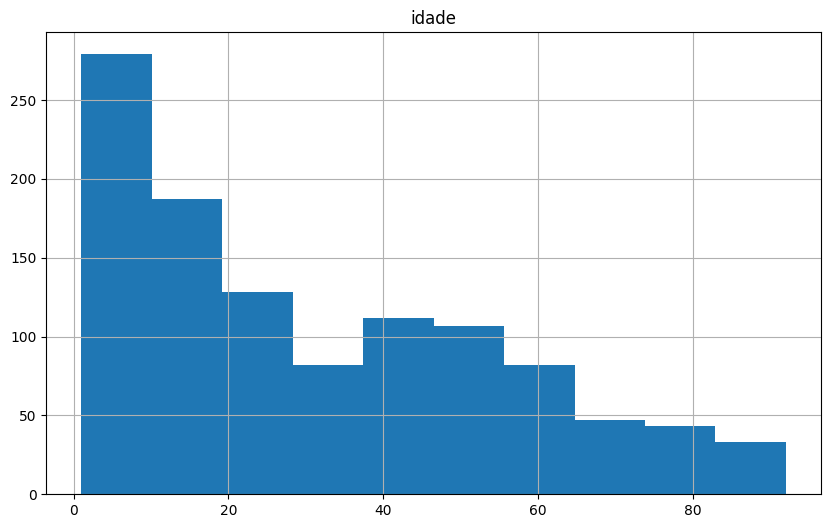

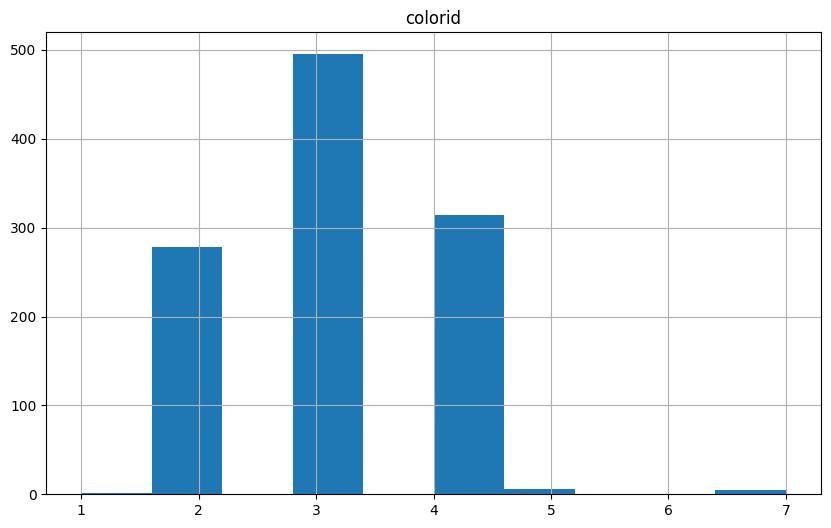

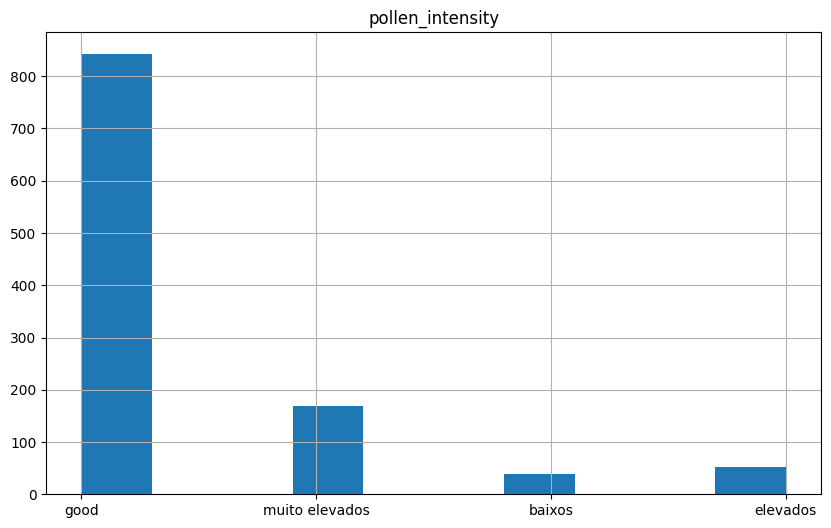

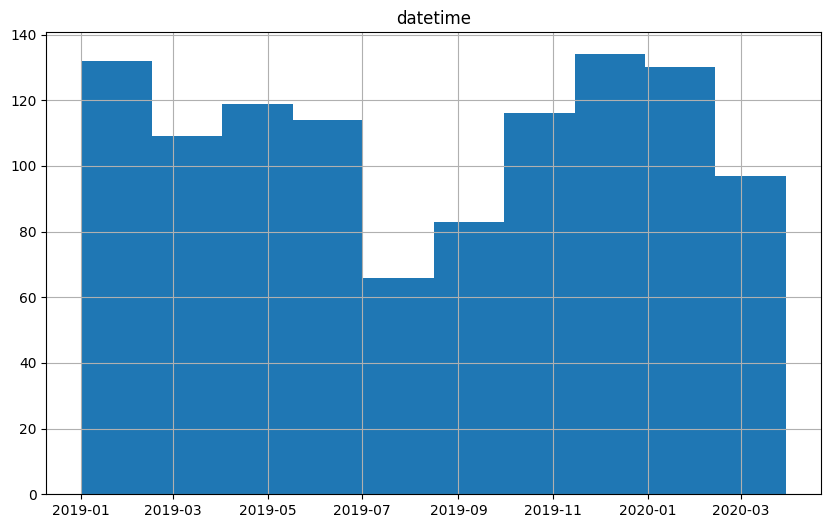

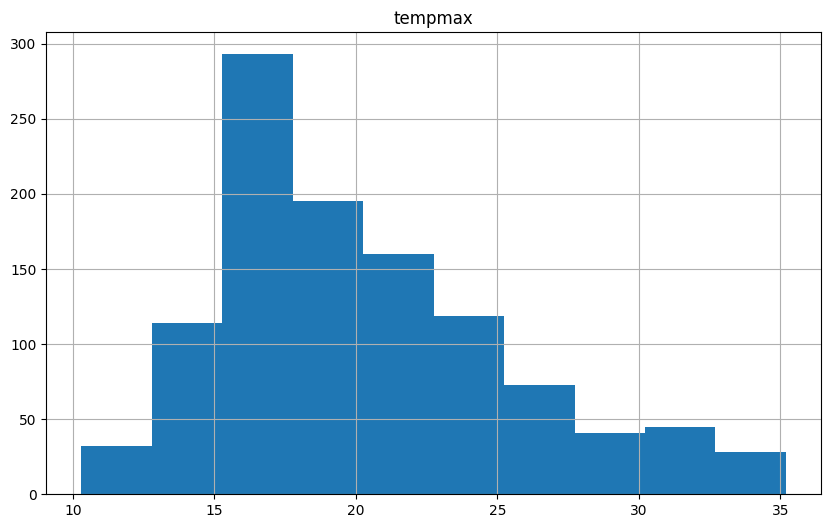

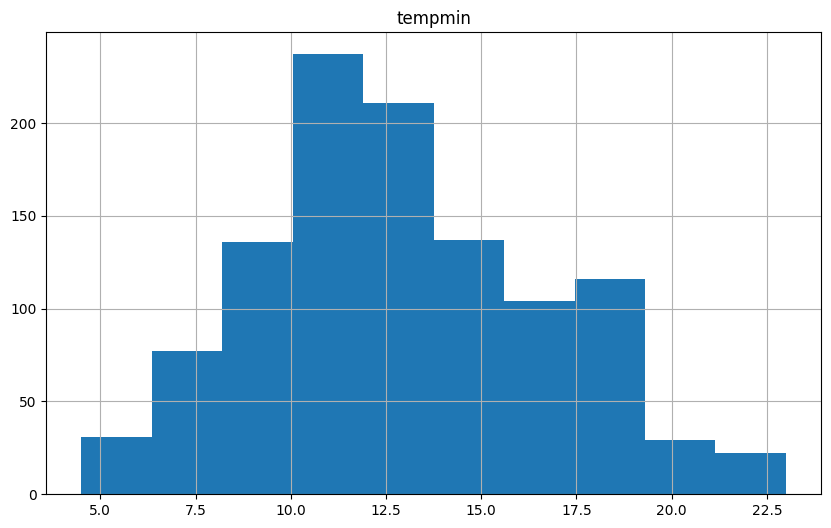

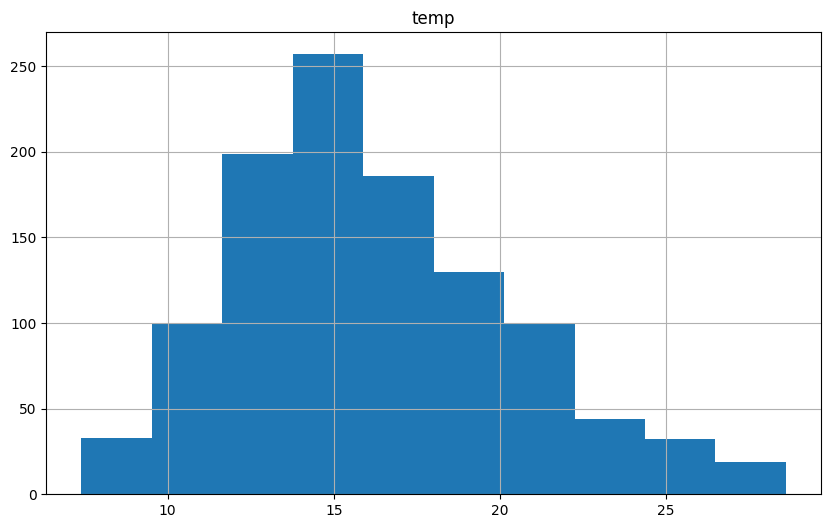

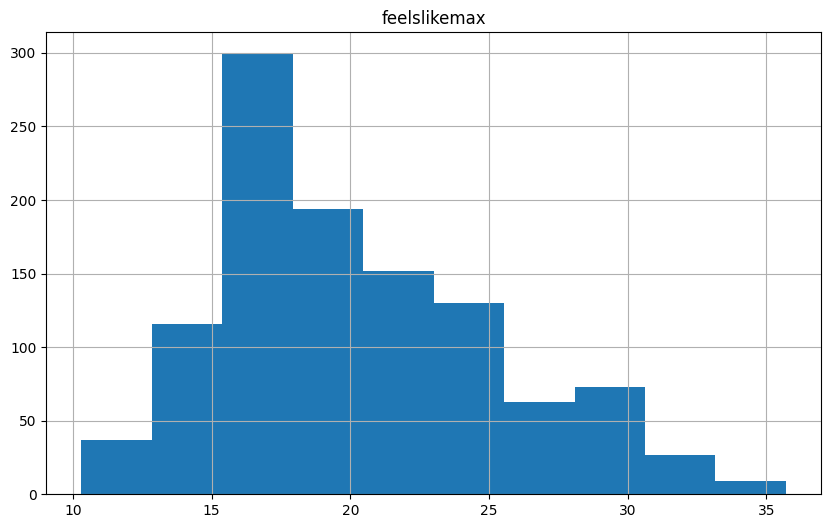

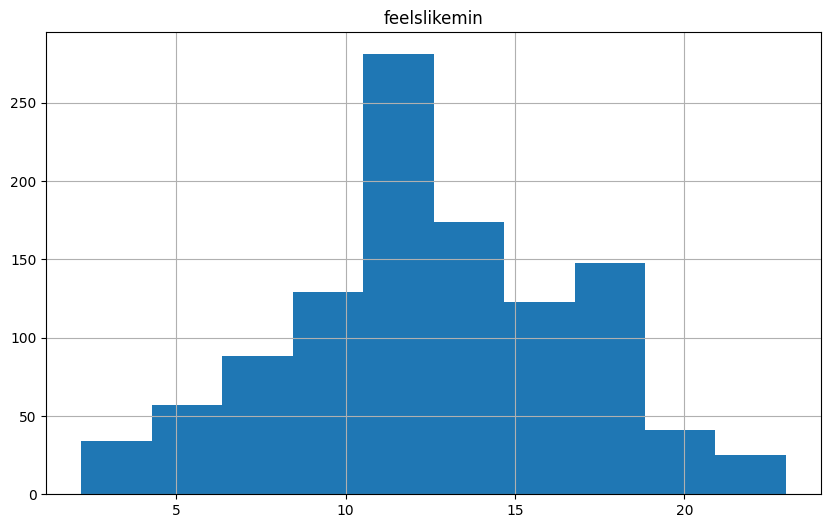

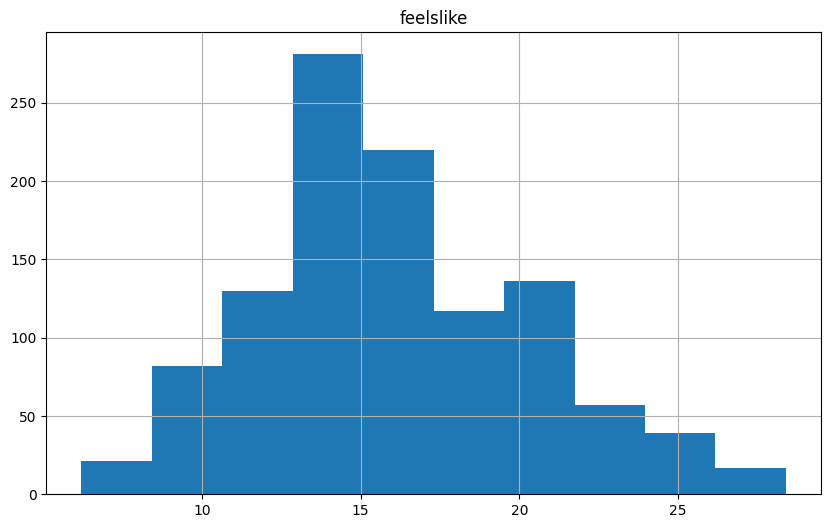

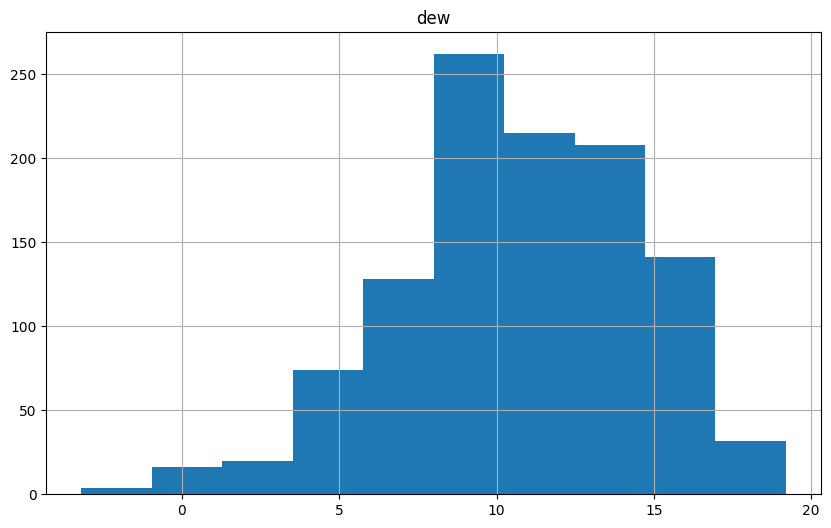

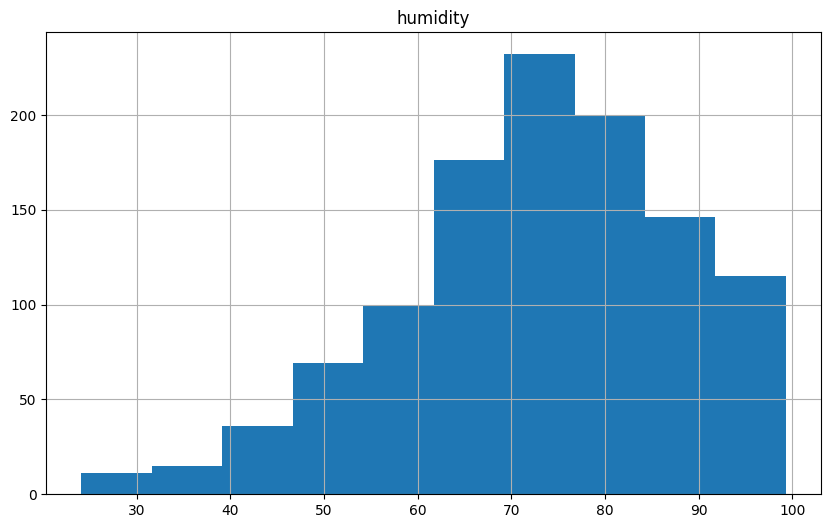

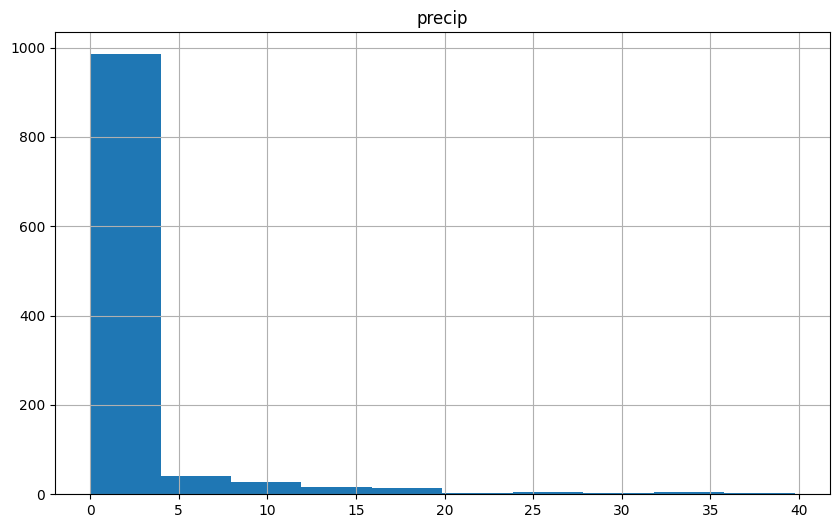

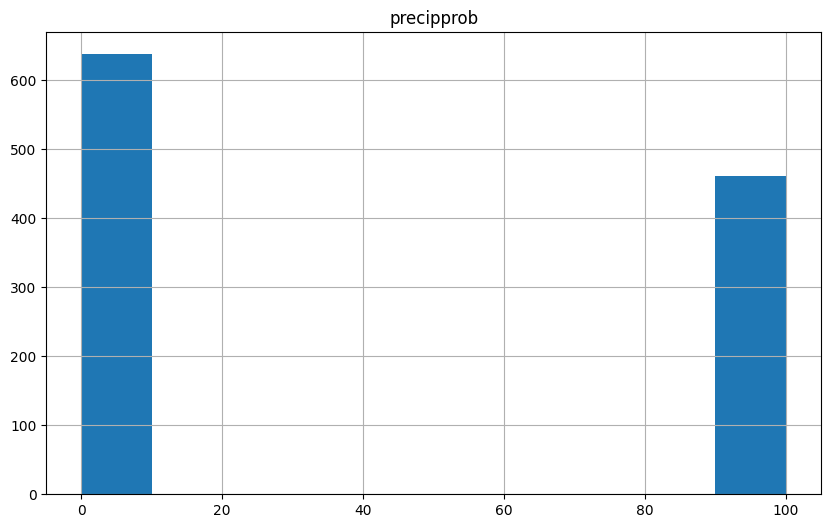

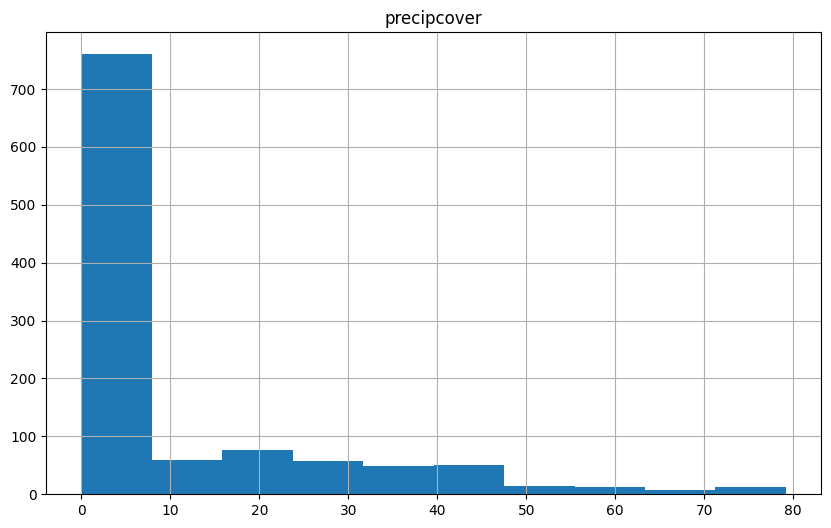

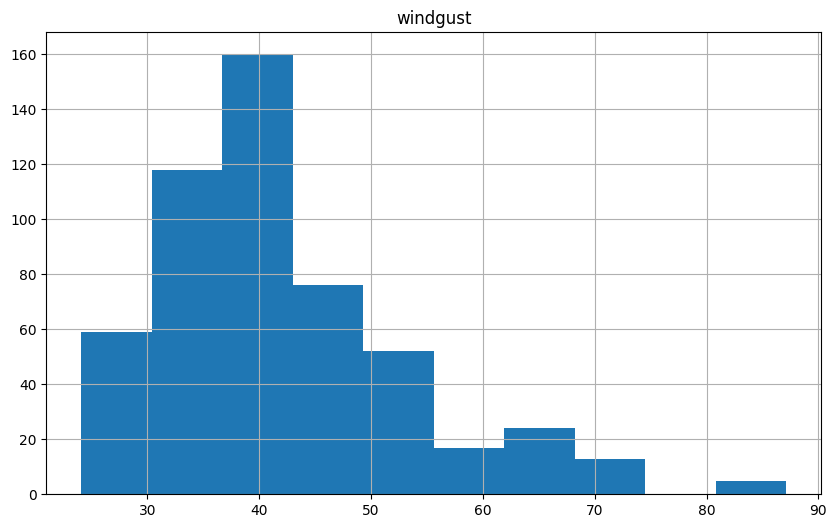

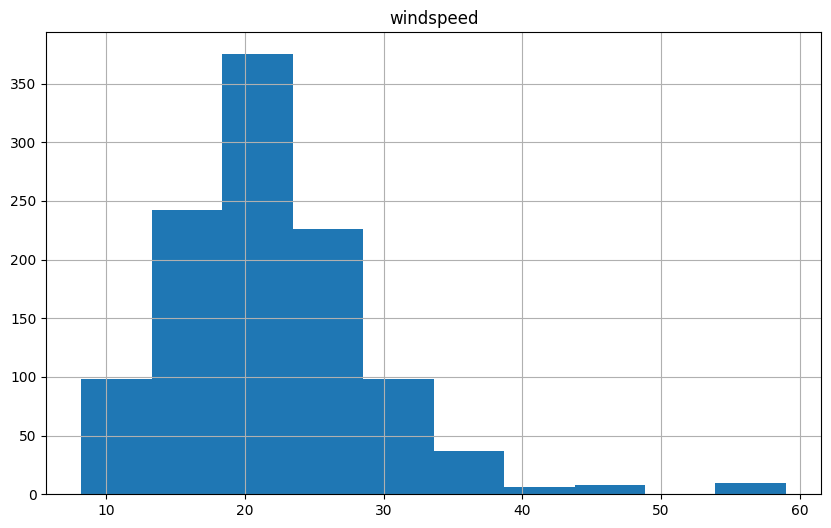

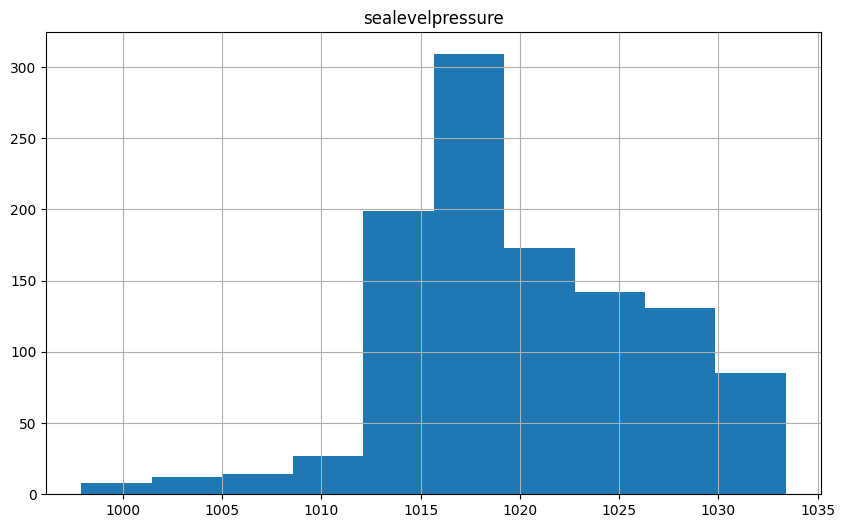

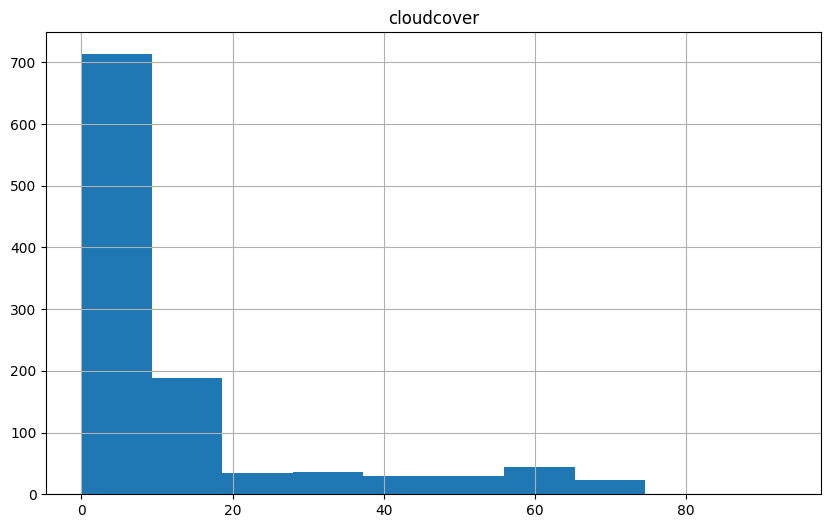

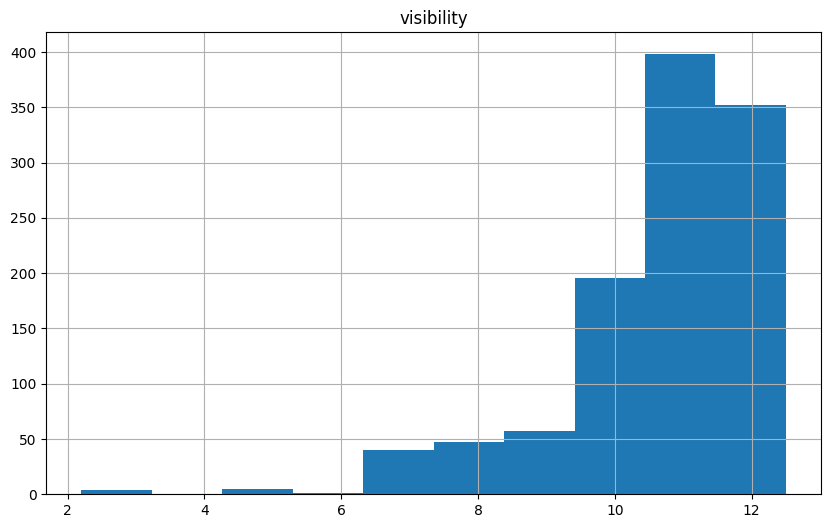

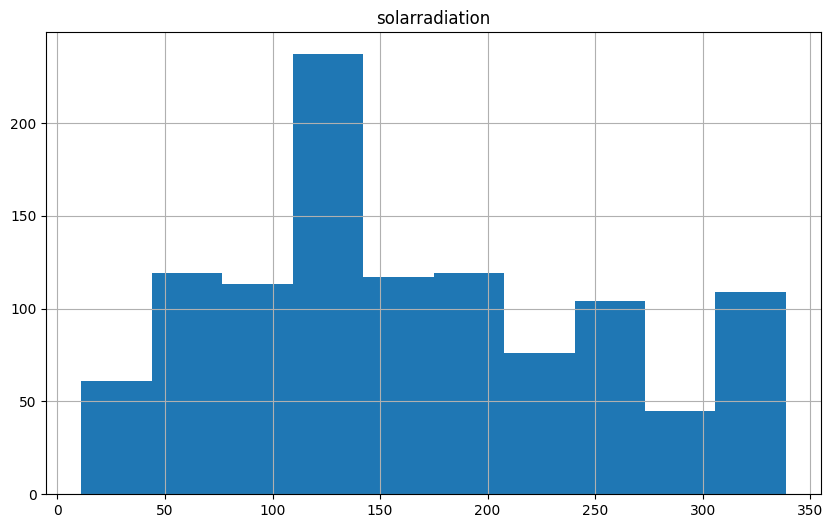

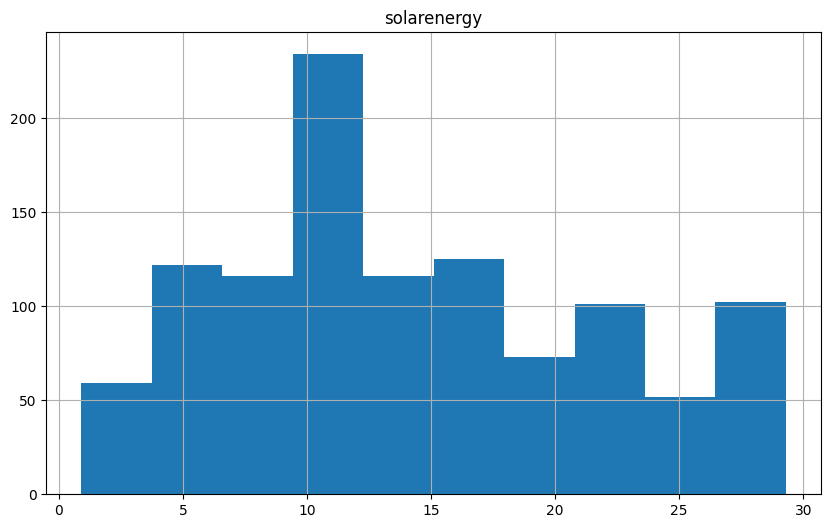

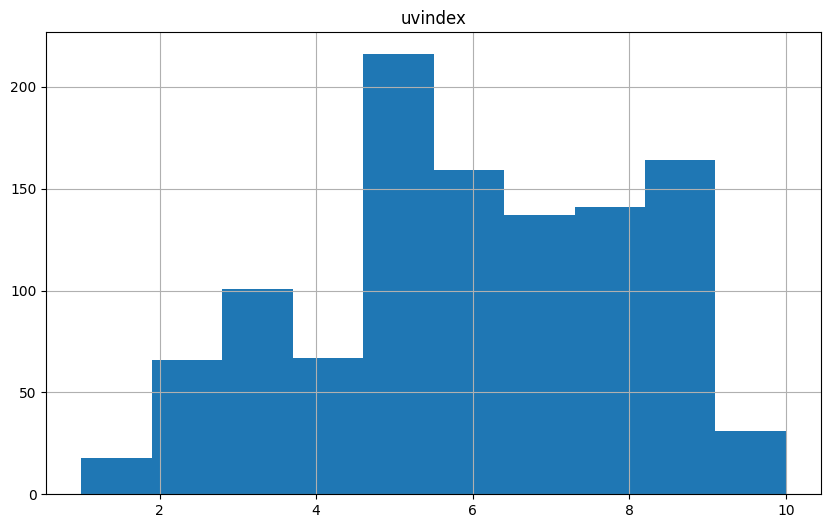

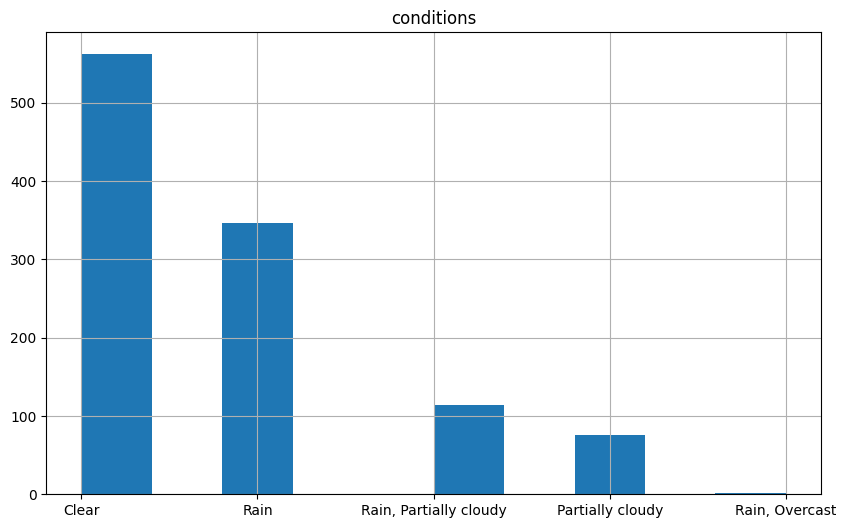

In [75]:
for col in df:
    df[col].hist(figsize=(10,6))
    plt.title(col)
    plt.show()


In [76]:
weather = pd.read_excel('Lisbon,Portugal 2019-01-01 to 2020-03-31.xlsx')

array([[<AxesSubplot: title={'center': 'tempmax'}>,
        <AxesSubplot: title={'center': 'tempmin'}>,
        <AxesSubplot: title={'center': 'temp'}>,
        <AxesSubplot: title={'center': 'feelslikemax'}>,
        <AxesSubplot: title={'center': 'feelslikemin'}>],
       [<AxesSubplot: title={'center': 'feelslike'}>,
        <AxesSubplot: title={'center': 'dew'}>,
        <AxesSubplot: title={'center': 'humidity'}>,
        <AxesSubplot: title={'center': 'precip'}>,
        <AxesSubplot: title={'center': 'precipprob'}>],
       [<AxesSubplot: title={'center': 'precipcover'}>,
        <AxesSubplot: title={'center': 'snow'}>,
        <AxesSubplot: title={'center': 'snowdepth'}>,
        <AxesSubplot: title={'center': 'windgust'}>,
        <AxesSubplot: title={'center': 'windspeed'}>],
       [<AxesSubplot: title={'center': 'winddir'}>,
        <AxesSubplot: title={'center': 'sealevelpressure'}>,
        <AxesSubplot: title={'center': 'cloudcover'}>,
        <AxesSubplot: title={'cente

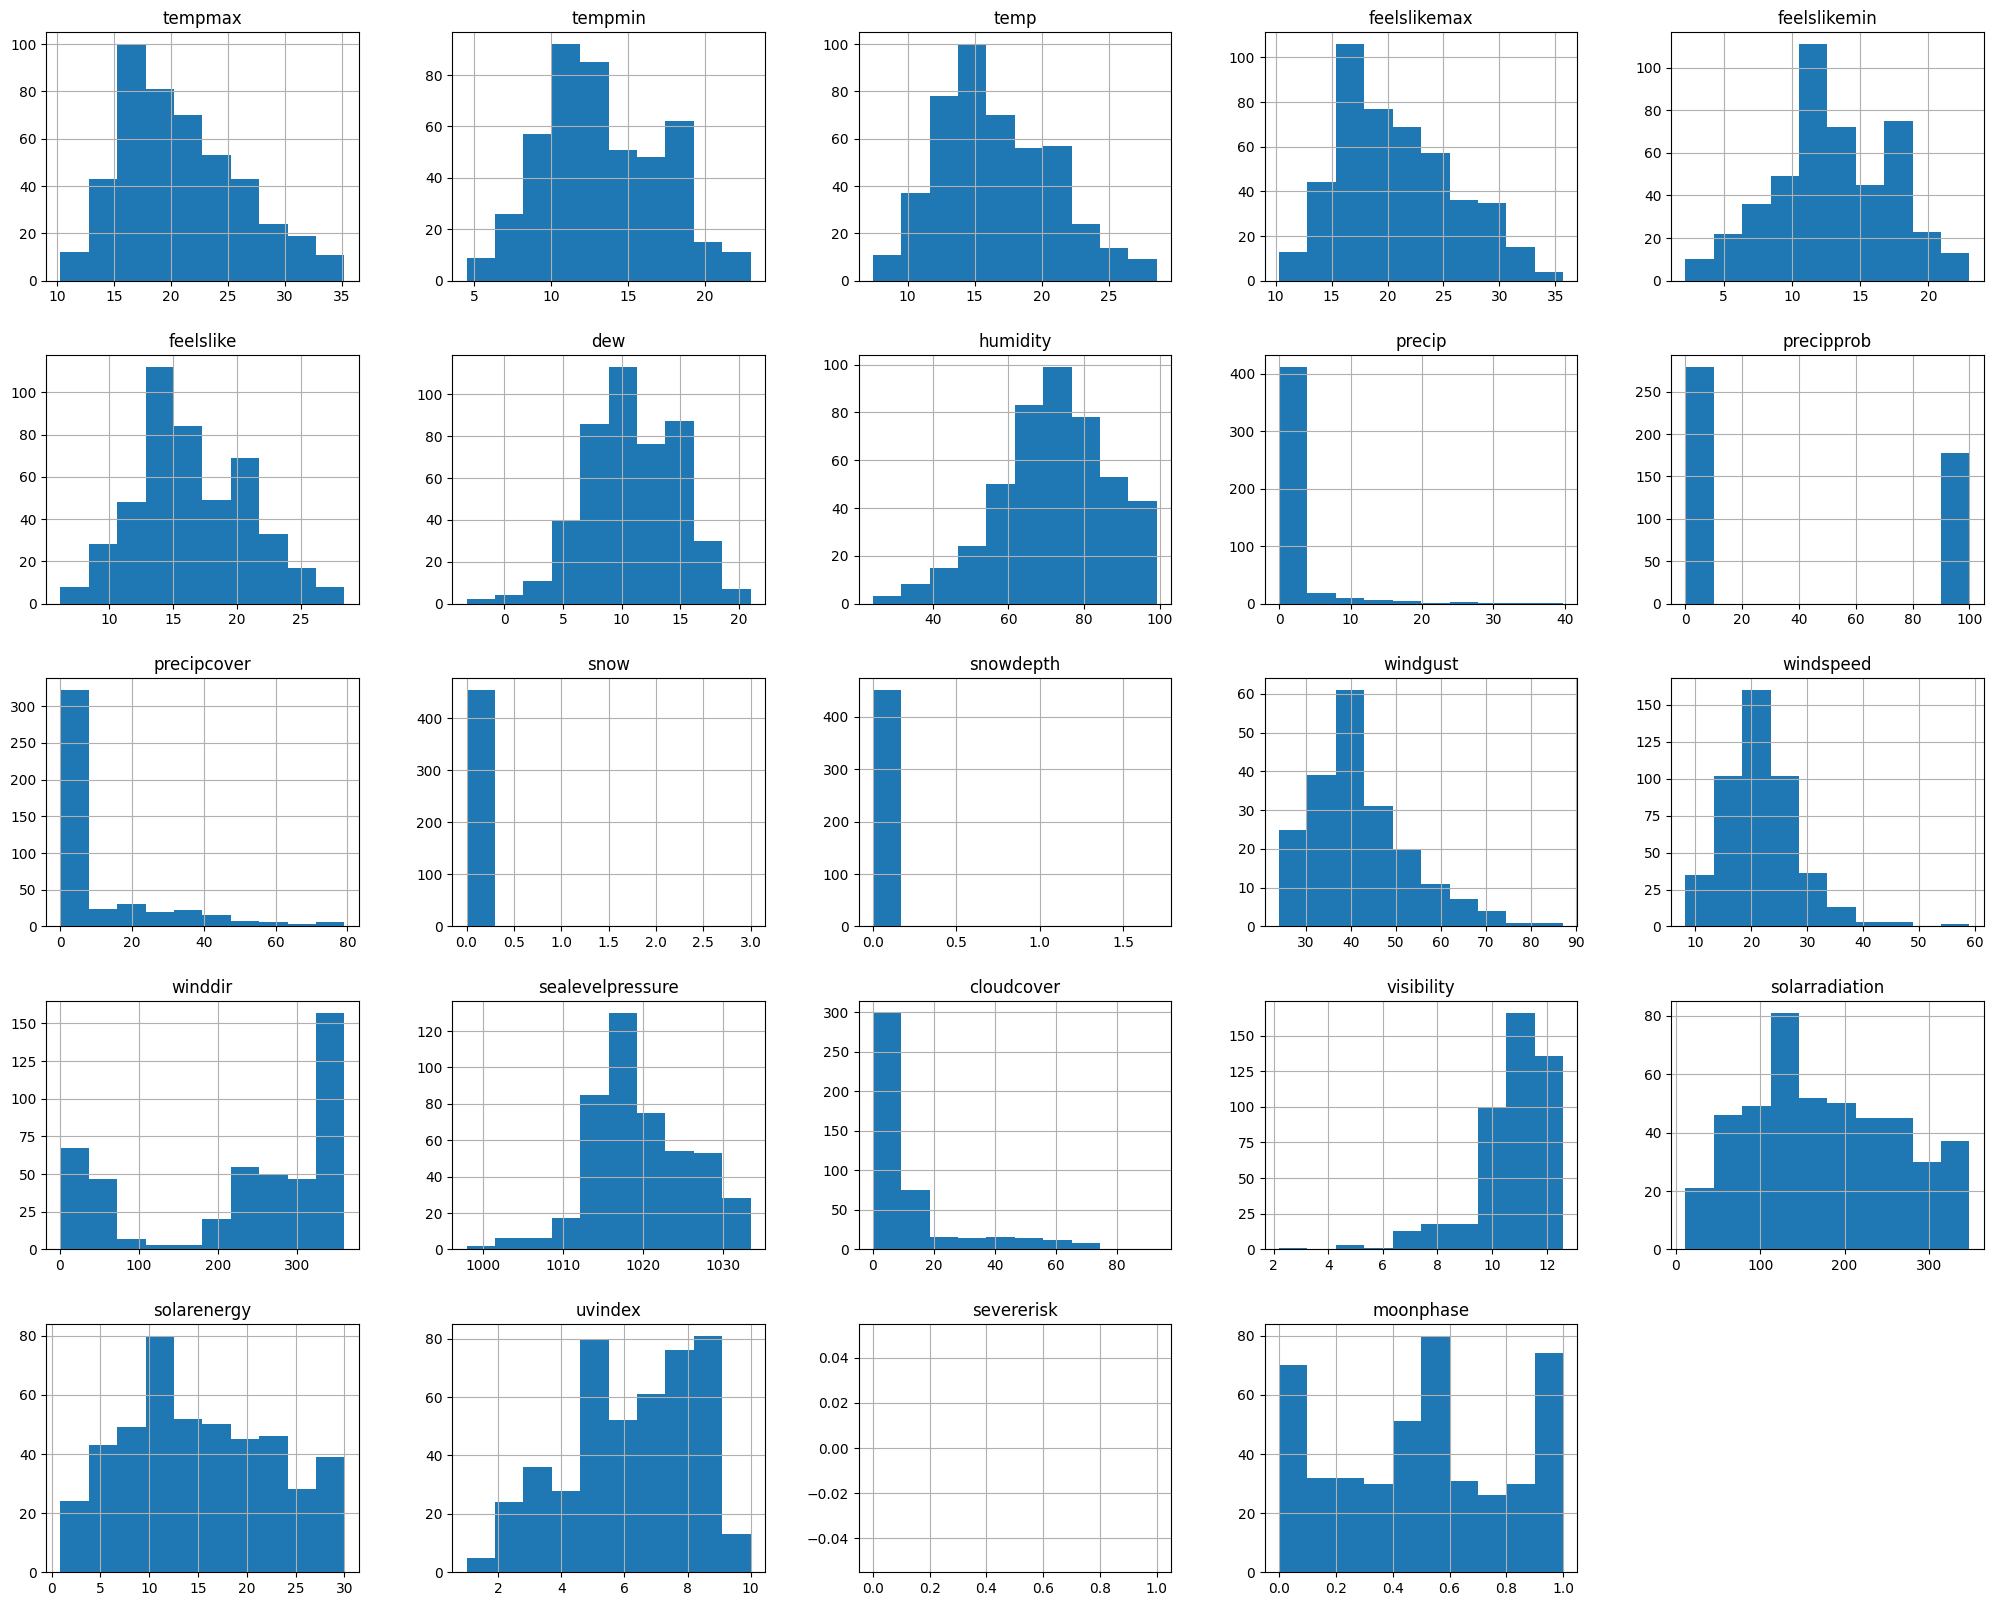

In [77]:
weather.hist(figsize=(25,20))

In [78]:
# tempAmplitude